In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

In [5]:
#importing the dataset
dataset = pd.read_csv("phishcoop.csv")
dataset = dataset.drop('id', 1) #removing unwanted column
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

In [6]:
#spliting the dataset into training set and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42 )

In [7]:
#applying grid search to find best performing parameters 
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100,700], 'max_features': ['sqrt', 'log2']}]

In [8]:
# 'criterion' :['gini', 'entropy']}]
grid_search = GridSearchCV(RandomForestClassifier(), parameters,cv =5,n_jobs= -1)
grid_search.fit(x_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 700]}])

In [9]:
#printing best parameters
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_))

Best Accurancy =0.9720174564153126
best parameters ={'max_features': 'log2', 'n_estimators': 700}


In [10]:
#fitting RandomForest regression with best params
classifier = RandomForestClassifier(n_estimators = 100, max_features = 'log2',random_state = 0)
classifier.fit(x_train, y_train.ravel())

RandomForestClassifier(max_features='log2', random_state=0)

In [11]:
#predicting the tests set result
from sklearn.metrics import mean_squared_error
y_pred = classifier.predict(x_test)

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

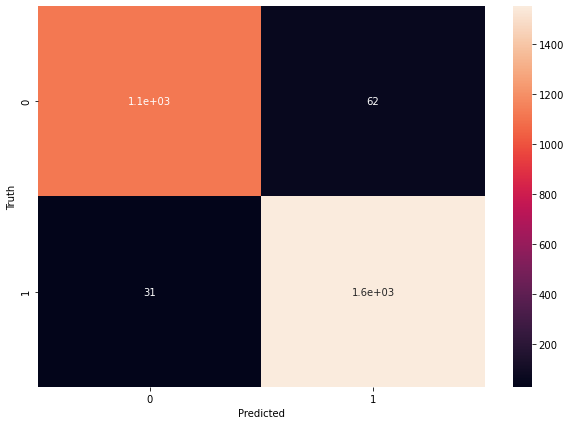

In [16]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
#Creating the RandomForest Model
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor()
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)
prediction = forest_reg.predict(x_test)
rmse = mean_squared_error(y_pred,y_test.ravel())

<ipython-input-17-13edba55c623>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(x_train,y_train)


In [18]:
#pickle file joblib
joblib.dump(classifier, 'rf_final.pkl')

['rf_final.pkl']

In [19]:
#Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances = classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances,names[indices], columns=['importance'])

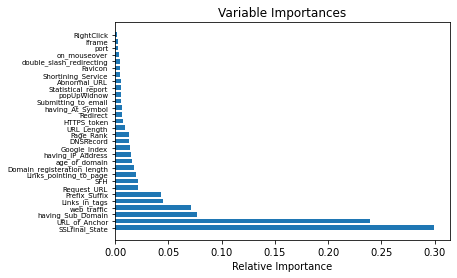

In [20]:
#plotting variable importance
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()